## Chapter 1
### 1.1 How to use dates & times with pandas

In [40]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
time_stamp = pd.Timestamp(datetime(2017,1,1))
time_stamp

Timestamp('2017-01-01 00:00:00')

In [3]:
pd.Timestamp('2017-01-01')

Timestamp('2017-01-01 00:00:00')

In [4]:
time_stamp.year

2017

In [5]:
time_stamp.day_name()

'Sunday'

In [6]:
period = pd.Period('2017-01')
period

Period('2017-01', 'M')

In [9]:
period.asfreq('D')

Period('2017-01-31', 'D')

In [10]:
period.to_timestamp().to_period('M')

Period('2017-01', 'M')

In [11]:
period

Period('2017-01', 'M')

In [12]:
period + 2

Period('2017-03', 'M')

In [15]:
index = pd.date_range(start='2017-01-01',periods=12, freq='M')
index

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')

In [16]:
index[0]

Timestamp('2017-01-31 00:00:00', freq='M')

In [17]:
index.to_period()

PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
            dtype='period[M]')

In [21]:
# Create the range of dates here
seven_days = pd.date_range(start='2017-01-01', periods=7, freq='D')

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())



6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


### 1.2 Indexing & resampling time series

In [42]:
google = pd.read_csv('datasets/google.csv')
google.columns = ['date','price']
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1094 non-null   object 
 1   price   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [43]:
google.head()

,date,price
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,558.10


In [44]:
google.date = pd.to_datetime(google.date)
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1094 non-null   datetime64[ns]
 1   price   756 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [45]:
google = google.set_index('date')

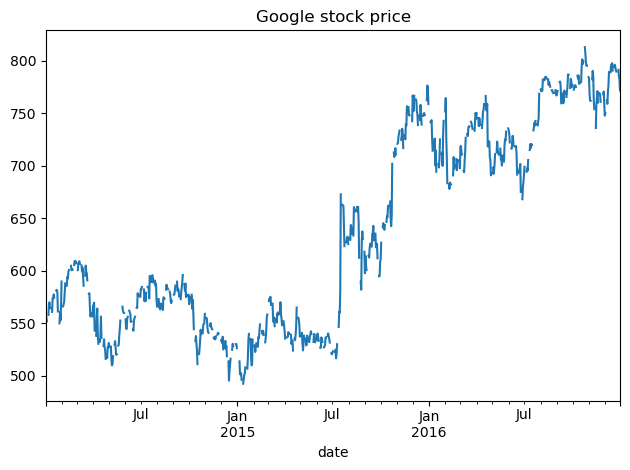

In [46]:
google.price.plot(title='Google stock price')
plt.tight_layout()
plt.show()

In [48]:
google.loc['2015'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   252 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [49]:
google.loc['2015-3':'2016-2'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2015-03-01 to 2016-02-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   252 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [50]:
google.loc['2016-6-1','price']

734.15

In [51]:
google.asfreq('D').head()

,price
date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [52]:
google = google.asfreq('B') #Business-day frequency
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2014-01-02 to 2016-12-30
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   756 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


In [54]:
google[~google.price.isnull()]

,price
date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04
...,...
2016-12-23,789.91
2016-12-27,791.55
2016-12-28,785.05


In [58]:
data = pd.read_csv('datasets//nyc.csv')

# Inspect data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None


In [59]:

# Convert the date column to datetime64
data.date = pd.to_datetime(data.date)

# Set date column as index
data.set_index('date', inplace=True)

# Inspect data 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB
None


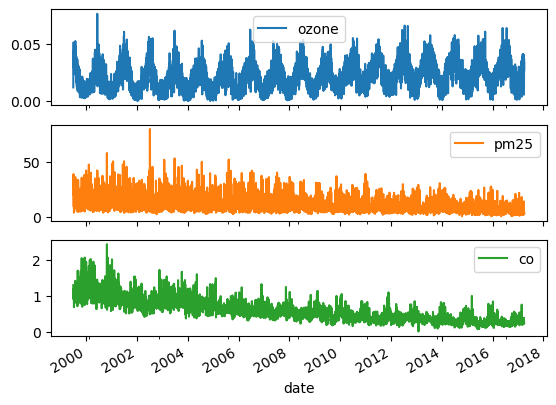

In [60]:
# Plot data
data.plot(subplots=True)
plt.show()

In [63]:
yahoo = pd.read_csv('datasets\yahoo.csv')
yahoo.date = pd.to_datetime(yahoo.date)
yahoo.set_index('date',inplace=True)
yahoo.head()

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


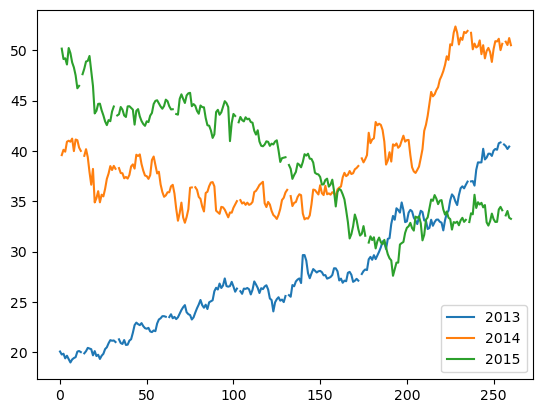

In [65]:
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot()
plt.show()


In [73]:
co = pd.read_csv('datasets//co_cities.csv')
co.date = pd.to_datetime(co.date)
co.set_index('date',inplace=True)
co.head()

,Chicago,Los Angeles,New York
date,,,
2005-01-01,0.317763,0.777657,0.639830
2005-01-03,0.520833,0.349547,0.969572
2005-01-04,0.477083,0.626630,0.905208
2005-01-05,0.348822,0.613814,0.769176
2005-01-06,0.572917,0.792596,0.815761


In [74]:
# Inspect data
print(co.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 59.3 KB
None


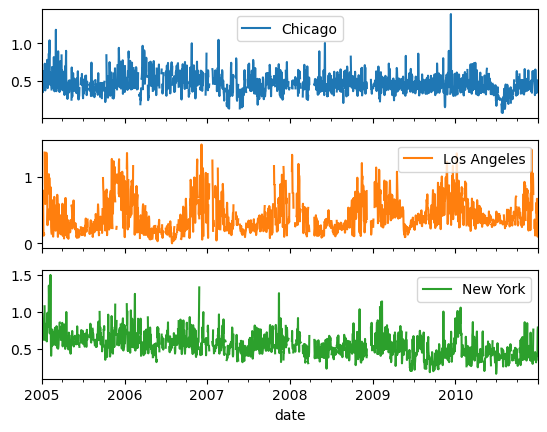

In [75]:

# Set the frequency to calendar daily
co = co.asfreq('D')

# Plot the data
co.plot(subplots=True)
plt.show()


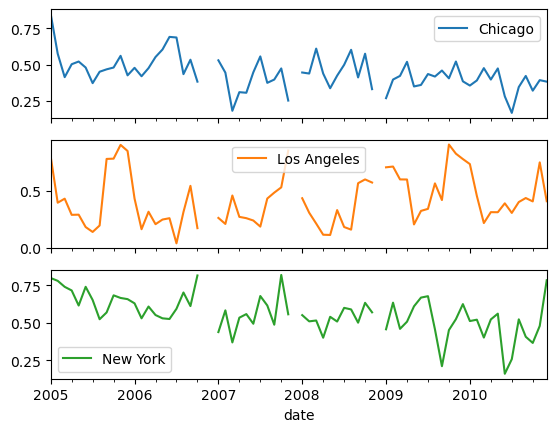

In [76]:
# Set frequency to monthly
co = co.asfreq('M')

# Plot the data
co.plot(subplots=True)
plt.show()



### 1.3 Lags, changes, and returns for stock price series

In [89]:
google = pd.read_csv('datasets//google.csv',parse_dates=['Date'],index_col='Date')


In [90]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


In [91]:
google.index.name = 'date'
google.columns = ['price']

In [92]:
google.head()

,price
date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [93]:
google['shifted']=google.price.shift() #default: periods = 1 
google.head()

,price,shifted
date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,556.00
2014-01-04,NaN,551.95
2014-01-05,NaN,NaN
2014-01-06,558.10,NaN


In [94]:
google['lagged'] = google.price.shift(periods=-1)
google.tail()

,price,shifted,lagged
date,,,
2016-12-26,NaN,NaN,791.55
2016-12-27,791.55,NaN,785.05
2016-12-28,785.05,791.55,782.79
2016-12-29,782.79,785.05,771.82
2016-12-30,771.82,782.79,NaN


In [95]:
# One-period percent change 
google['change'] = google.price.div(google.shifted)
google.head()

,price,shifted,lagged,change
date,,,,
2014-01-02,556.00,NaN,551.95,NaN
2014-01-03,551.95,556.00,NaN,0.992716
2014-01-04,NaN,551.95,NaN,NaN
2014-01-05,NaN,NaN,558.10,NaN
2014-01-06,558.10,NaN,568.86,NaN


In [96]:
# One period percent change
google['return'] = google.change.sub(1).mul(100)
google.head()

,price,shifted,lagged,change,return
date,,,,,
2014-01-02,556.00,NaN,551.95,NaN,NaN
2014-01-03,551.95,556.00,NaN,0.992716,-0.728417
2014-01-04,NaN,551.95,NaN,NaN,NaN
2014-01-05,NaN,NaN,558.10,NaN,NaN
2014-01-06,558.10,NaN,568.86,NaN,NaN


In [98]:
#Built-in time-series change
google['diff'] = google.price.diff()
google.tail()

,price,shifted,lagged,change,return,diff
date,,,,,,
2016-12-26,NaN,NaN,791.55,NaN,NaN,NaN
2016-12-27,791.55,NaN,785.05,NaN,NaN,NaN
2016-12-28,785.05,791.55,782.79,0.991788,-0.821174,-6.50
2016-12-29,782.79,785.05,771.82,0.997121,-0.287880,-2.26
2016-12-30,771.82,782.79,NaN,0.985986,-1.401398,-10.97


In [99]:
#Built-in time-series % change
google['pct_change'] = google.price.pct_change().mul(100)
google.tail()

,price,shifted,lagged,change,return,diff,pct_change
date,,,,,,,
2016-12-26,NaN,NaN,791.55,NaN,NaN,NaN,0.000000
2016-12-27,791.55,NaN,785.05,NaN,NaN,NaN,0.207619
2016-12-28,785.05,791.55,782.79,0.991788,-0.821174,-6.50,-0.821174
2016-12-29,782.79,785.05,771.82,0.997121,-0.287880,-2.26,-0.287880
2016-12-30,771.82,782.79,NaN,0.985986,-1.401398,-10.97,-1.401398


In [100]:
google['return_3d'] = google.price.pct_change(periods=3).mul(100)
google.tail()

,price,shifted,lagged,change,return,diff,pct_change,return_3d
date,,,,,,,,
2016-12-26,NaN,NaN,791.55,NaN,NaN,NaN,0.000000,0.000000
2016-12-27,791.55,NaN,785.05,NaN,NaN,NaN,0.207619,0.207619
2016-12-28,785.05,791.55,782.79,0.991788,-0.821174,-6.50,-0.821174,-0.615260
2016-12-29,782.79,785.05,771.82,0.997121,-0.287880,-2.26,-0.287880,-0.901369
2016-12-30,771.82,782.79,NaN,0.985986,-1.401398,-10.97,-1.401398,-2.492578


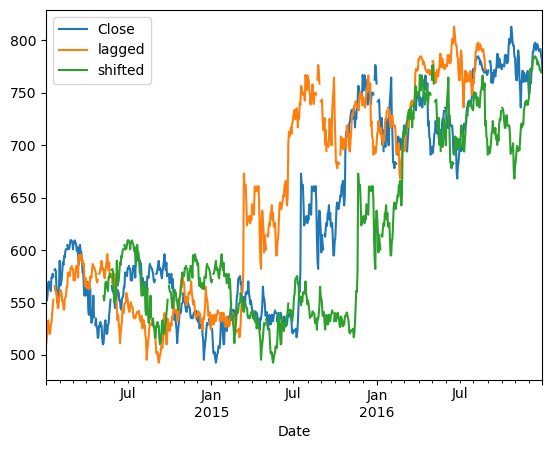

In [101]:
# Import data here
google = pd.read_csv('datasets//google.csv',parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(periods=-90)
google['shifted'] = google.Close.shift(periods=90)

# Plot the google price series
google[['Close','lagged','shifted']].plot()
plt.show()



In [110]:
yahoo = pd.read_csv('datasets/yahoo.csv')
yahoo.head()

,date,price
0,2013-01-02,20.08
1,2013-01-03,19.78
2,2013-01-04,19.86
3,2013-01-07,19.40
4,2013-01-08,19.66


In [111]:
yahoo.date = pd.to_datetime(yahoo.date)
yahoo.set_index('date', inplace=True)
yahoo = yahoo.asfreq('B')
yahoo.head()

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


In [112]:
# Created shifted_30 here
yahoo['shifted_30'] = yahoo.price.shift(periods=30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo.price.sub(yahoo.shifted_30)

# Get the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(periods=30)

# Inspect the last five rows of price
print(yahoo.tail())




            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64


In [113]:
# Show the value_counts of the difference between change_30 and diff_30
print(yahoo.diff_30.sub(yahoo.change_30).value_counts())

0.0    703
dtype: int64


In [116]:
# Import data here
google = pd.read_csv('datasets//google.csv',parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('D')

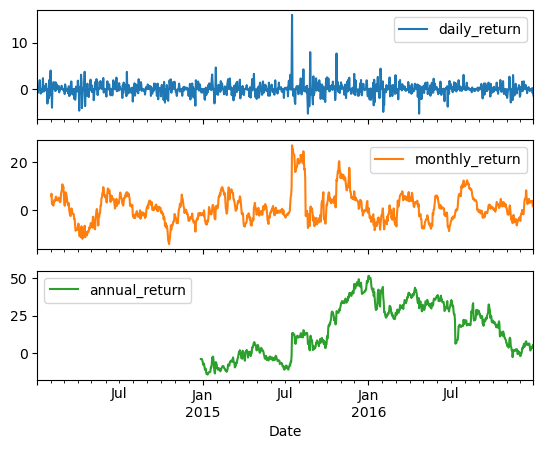

In [118]:
# Create daily_return
google['daily_return'] = google.Close.pct_change(periods=1).mul(100)

# Create monthly_return
google['monthly_return'] = google.Close.pct_change(periods=30).mul(100)

# Create annual_return
google['annual_return'] = google.Close.pct_change(periods=360).mul(100)

# Plot the result
google[['daily_return','monthly_return','annual_return']].plot(subplots=True)
plt.show()


## Chapter 2
### 2.1 Compare time series growth rates

In [119]:
google = pd.read_csv('datasets/google.csv',parse_dates=['Date'],index_col='Date')
google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [120]:
first_price = google.Close.iloc[0]
first_price

556.0

<AxesSubplot:title={'center':'Google normalised series'}, xlabel='Date'>

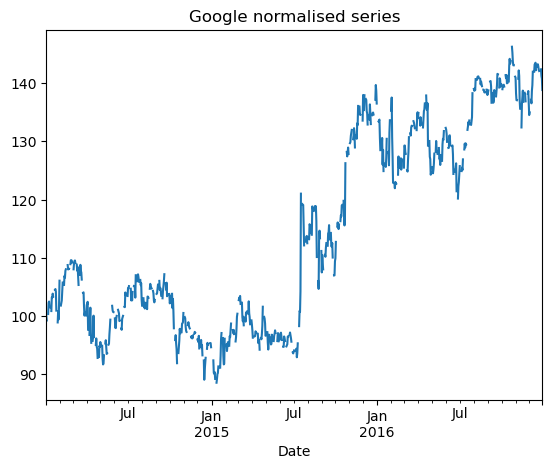

In [122]:
normalized = google.Close.div(first_price).mul(100)
normalized.plot(title='Google normalised series')

In [138]:
# Multiple series

prices = pd.read_csv('datasets/stock_data.csv',parse_dates=['Date'],index_col='Date')
prices.head()


,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
Date,,,,,,,,,,,,
2010-01-04,30.57,57.72,133.90,4.55,24.27,173.08,30.55,25.68,27.00,56.03,28.55,58.18
2010-01-05,30.63,57.22,134.69,4.55,24.18,176.14,30.35,25.61,27.30,56.90,28.53,58.28
2010-01-06,30.14,56.79,132.25,4.53,24.25,174.26,32.22,25.56,27.29,58.64,28.23,57.85
2010-01-07,30.08,56.27,130.00,4.50,24.56,177.67,32.77,25.39,26.96,58.65,27.75,57.41
2010-01-08,30.28,56.77,133.52,4.52,24.66,174.31,33.15,25.40,27.05,59.30,27.57,60.17


In [139]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB


In [140]:
normalized = prices.div(prices.iloc[0])
normalized.head()

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
Date,,,,,,,,,,,,
2010-01-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2010-01-05,1.001963,0.991337,1.005900,1.000000,0.996292,1.017680,0.993453,0.997274,1.011111,1.015527,0.999299,1.001719
2010-01-06,0.985934,0.983888,0.987677,0.995604,0.999176,1.006818,1.054664,0.995327,1.010741,1.046582,0.988792,0.994328
2010-01-07,0.983971,0.974879,0.970874,0.989011,1.011949,1.026520,1.072668,0.988707,0.998519,1.046761,0.971979,0.986765
2010-01-08,0.990514,0.983541,0.997162,0.993407,1.016069,1.007107,1.085106,0.989097,1.001852,1.058362,0.965674,1.034204


In [142]:
tickers = list(normalized.columns)
tickers

['AAPL',
 'AMGN',
 'AMZN',
 'CPRT',
 'EL',
 'GS',
 'ILMN',
 'MA',
 'PAA',
 'RIO',
 'TEF',
 'UPS']

In [143]:
index = pd.read_csv('datasets/sp500.csv',parse_dates=['date'],index_col='date')
index.tail()

,SP500
date,
2016-12-23,2263.79
2016-12-27,2268.88
2016-12-28,2249.92
2016-12-29,2249.26
2016-12-30,2238.83


In [144]:
prices = pd.concat([prices, index],axis=1).dropna()
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1761 entries, 2010-01-04 to 2016-12-30
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1761 non-null   float64
 5   GS      1761 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1761 non-null   float64
 8   PAA     1761 non-null   float64
 9   RIO     1761 non-null   float64
 10  TEF     1761 non-null   float64
 11  UPS     1761 non-null   float64
 12  SP500   1761 non-null   float64
dtypes: float64(13)
memory usage: 192.6 KB


<AxesSubplot:>

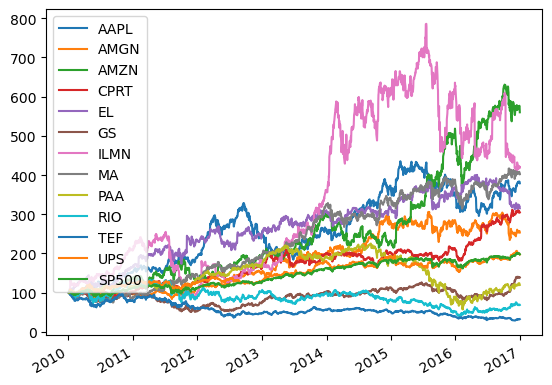

In [145]:
normalized = prices.div(prices.iloc[0]).mul(100)
normalized.plot()

In [147]:
diff = normalized[tickers].sub(normalized['SP500'],axis=0)
diff.tail()

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
2016-12-23,181.351292,55.823924,368.221673,105.468019,123.143438,-60.582070,221.633556,207.942515,-76.065965,-131.771725,-167.687617,-0.477040
2016-12-27,183.322712,56.777997,375.845608,107.436348,122.076137,-60.690441,221.806233,207.843729,-76.218923,-131.810484,-168.276976,-0.651285
2016-12-28,183.360570,57.256019,378.064240,106.692214,119.588069,-59.542761,220.173626,205.155806,-76.175104,-129.208962,-166.953790,-0.576324
2016-12-29,183.320687,57.504847,372.909647,106.530686,119.852338,-60.911594,222.817803,205.564526,-78.265000,-129.097166,-166.545275,-0.896208
2016-12-30,181.264486,55.705392,362.418719,106.791919,117.559067,-59.257256,221.512517,204.460177,-78.011093,-128.961887,-165.379518,-0.560028


<AxesSubplot:>

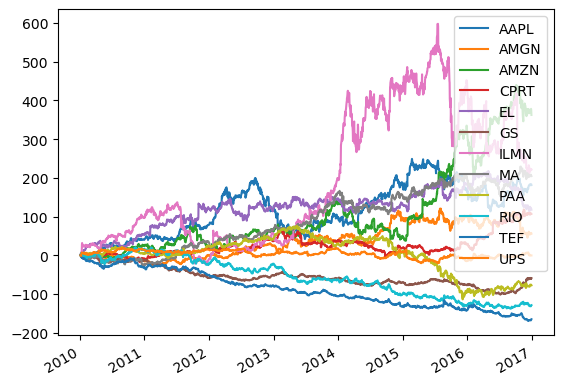

In [148]:
diff.plot()